<a href="https://colab.research.google.com/github/sohomghosh/Data_Visualization_FDP/blob/main/CaseStudy_2_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset:
Link to download the dataset for case study 2: https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news

# Notebook
This notebook is available for download at https://github.com/sohomghosh/Data_Visualization_FDP

# Documentations

Word Cloud: http://amueller.github.io/word_cloud/

Spacy Visualizers: https://spacy.io/usage/visualizers

Scatter Plots using TSNE of Embeddings

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Word Cloud

In [7]:
!pip install wordcloud

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
other_stopwords_to_remove = ['abracadabra', 'etc']
STOPWORDS = STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)

In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/sohomghosh/Data_Visualization_FDP/main/all-data.csv", header = 0)
data.columns = ['sentiment', 'news']
data

,sentiment,news
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [11]:
text=data["news"]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=2000,
                stopwords = stopwords, 
                min_font_size = 10).generate(str(text))

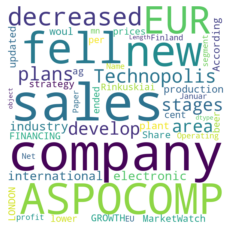

In [12]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

# NER

In [14]:
LONG_NEWS_ARTICLE = data.iloc[0,]['news']
doc2 = nlp(LONG_NEWS_ARTICLE)
displacy.render(doc2, style="ent", jupyter=True, options={"distance" : 140})

# Dependency Tree

In [15]:
doc = nlp(LONG_NEWS_ARTICLE)
displacy.render(doc, style="dep", jupyter=True, options={"distance" : 140})

# Scatter Plot using TSNE of Embeddings

In [16]:
data_use = data.sample(100, random_state=1).copy()

In [17]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.2 MB/s 
     |████████████████████████████████| 3.3 MB 11.0 MB/s 
     |████████████████████████████████| 3.3 MB 44.4 MB/s 
     |████████████████████████████████| 1.2 MB 47.3 MB/s 
     |████████████████████████████████| 61 kB 460 kB/s 
     |████████████████████████████████| 596 kB 63.7 MB/s 
     |████████████████████████████████| 895 kB 34.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=da0e1c6044a1bbeba4e096ea4ab4b5f593966bd622b83be569ff70667122883f
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [18]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')
embeddings = model.encode(data_use['news'].values)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/610 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/531 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [19]:
from sklearn.manifold import TSNE
X_embedded_tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(embeddings)

In [20]:
embed_df = pd.DataFrame(X_embedded_tsne)
embed_df['sentiment'] = data_use['sentiment'].values

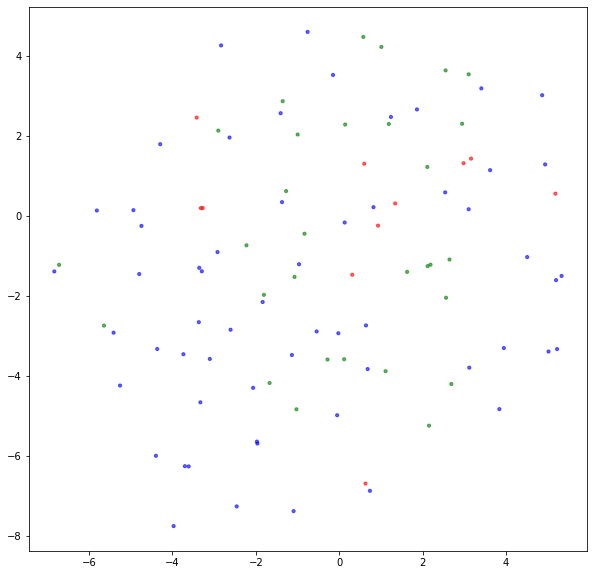

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(embed_df[0], embed_df[1], c=embed_df['sentiment'].map({'negative':'red', 'neutral':'blue', 'positive':'green'}), alpha = 0.6, s=10)